In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Batting Subclasses)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point directly inside Batting folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/Batting", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Batting", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Batting", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

classes = train_ds.classes
print("Batting Subclasses:", classes)
print("Train samples:", len(train_ds), "Val samples:", len(val_ds), "Test samples:", len(test_ds))


Batting Subclasses: ['Cut', 'Drive', 'Leg Shot', 'PullShot', 'Scoop', 'Straight', 'Sweep']
Train samples: 5814 Val samples: 1494 Test samples: 1863


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 5814
Total validation images: 1494
Total test images: 1863
Total images in dataset: 9171


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 5168
Validation images (excluding 'random_occlusion'): 1328
Test images (excluding 'random_occlusion'): 1656
Total images (excluding 'random_occlusion'): 8152


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'lens_flare', 'motion_blur', 'random_occlusion', 'low_resolution', 'blur', 'gaussian_noise', 'chromatic_aberration', 'dirty_lens', 'original'}
Validation folders considered: {'lens_flare', 'motion_blur', 'random_occlusion', 'low_resolution', 'blur', 'gaussian_noise', 'chromatic_aberration', 'dirty_lens', 'original'}
Test folders considered: {'lens_flare', 'motion_blur', 'random_occlusion', 'low_resolution', 'blur', 'gaussian_noise', 'chromatic_aberration', 'dirty_lens', 'original'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Batting", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Batting", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Batting", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['Cut', 'Drive', 'Leg Shot', 'PullShot', 'Scoop', 'Straight', 'Sweep']
Final Training images: 5168
Final Validation images: 1328
Final Test images: 1656
Total images after filtering: 8152


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'lens_flare', 'motion_blur', 'low_resolution', 'blur', 'gaussian_noise', 'chromatic_aberration', 'dirty_lens', 'original'}
Validation folders considered: {'lens_flare', 'motion_blur', 'low_resolution', 'blur', 'gaussian_noise', 'chromatic_aberration', 'dirty_lens', 'original'}
Test folders considered: {'lens_flare', 'motion_blur', 'low_resolution', 'blur', 'gaussian_noise', 'chromatic_aberration', 'dirty_lens', 'original'}


In [7]:
import seaborn as sns
import numpy as np
import time
from tqdm import tqdm

In [8]:
# -----------------------------
# 2. Define ResNet50 Model from Scratch
# -----------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time

class Bottleneck(nn.Module):
    """Bottleneck block for ResNet50"""
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class MyResNet50(nn.Module):
    """ResNet50 Implementation from Scratch"""
    def __init__(self, num_classes=4, zero_init_residual=False):
        super().__init__()
        self.inplanes = 64
        
        # Initial convolution and pooling layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # Residual layers
        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)
        
        # Final layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * Bottleneck.expansion, num_classes)
        
        # Initialize weights
        self._initialize_weights(zero_init_residual)
    
    def _make_layer(self, planes, blocks, stride=1):
        """Create a residual layer with specified number of blocks"""
        downsample = None
        if stride != 1 or self.inplanes != planes * Bottleneck.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * Bottleneck.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * Bottleneck.expansion),
            )
        
        layers = []
        layers.append(Bottleneck(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * Bottleneck.expansion
        for _ in range(1, blocks):
            layers.append(Bottleneck(self.inplanes, planes))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self, zero_init_residual):
        """Initialize weights using He initialization"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
        
        # Zero-initialize the last BN in each residual branch for better training
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

In [9]:
# -----------------------------
# 3. Training Setup
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyResNet50(num_classes=len(classes), zero_init_residual=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

print("ResNet50 Model Summary:")
try:
    summary(model, (3, 224, 224))
except:
    print("Model summary generation failed - this is normal for complex architectures")
    print(f"Model created successfully with {sum(p.numel() for p in model.parameters()):,} parameters")

ResNet50 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm


üöÄ Starting ResNet50 Training for 50 epochs...

üìà Epoch 1/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:46<00:00,  1.51it/s, Loss=2.7265, Acc=0.2620]


‚úÖ Training completed in 106.96s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:21<00:00,  1.96it/s, Loss=2.0846, Acc=0.2357]


‚úÖ Validation completed in 21.38s
üåü New best ResNet50 model found! Validation Accuracy: 0.2357

üìä Epoch 1 Summary:
‚îÇ Train Loss: 2.7265 | Train Acc: 0.2620
‚îÇ Val Loss:   2.0846 | Val Acc:   0.2357
‚îÇ Train Time: 106.96s | Val Time: 21.38s
‚îÇ Total Epoch Time: 128.34s
‚îÇ Best Val Acc: 0.2357 (Epoch 1)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 2/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:21<00:00,  2.00it/s, Loss=1.8634, Acc=0.2879]


‚úÖ Training completed in 81.06s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.24it/s, Loss=1.8654, Acc=0.2794]


‚úÖ Validation completed in 12.95s
üåü New best ResNet50 model found! Validation Accuracy: 0.2794

üìä Epoch 2 Summary:
‚îÇ Train Loss: 1.8634 | Train Acc: 0.2879
‚îÇ Val Loss:   1.8654 | Val Acc:   0.2794
‚îÇ Train Time: 81.06s | Val Time: 12.95s
‚îÇ Total Epoch Time: 94.01s
‚îÇ Best Val Acc: 0.2794 (Epoch 2)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 3/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=1.6489, Acc=0.3274]


‚úÖ Training completed in 85.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.34it/s, Loss=1.8250, Acc=0.3080]


‚úÖ Validation completed in 12.59s
üåü New best ResNet50 model found! Validation Accuracy: 0.3080

üìä Epoch 3 Summary:
‚îÇ Train Loss: 1.6489 | Train Acc: 0.3274
‚îÇ Val Loss:   1.8250 | Val Acc:   0.3080
‚îÇ Train Time: 85.54s | Val Time: 12.59s
‚îÇ Total Epoch Time: 98.14s
‚îÇ Best Val Acc: 0.3080 (Epoch 3)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 4/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=1.5889, Acc=0.3572]


‚úÖ Training completed in 85.41s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.27it/s, Loss=1.8300, Acc=0.3155]


‚úÖ Validation completed in 12.83s
üåü New best ResNet50 model found! Validation Accuracy: 0.3155

üìä Epoch 4 Summary:
‚îÇ Train Loss: 1.5889 | Train Acc: 0.3572
‚îÇ Val Loss:   1.8300 | Val Acc:   0.3155
‚îÇ Train Time: 85.41s | Val Time: 12.83s
‚îÇ Total Epoch Time: 98.25s
‚îÇ Best Val Acc: 0.3155 (Epoch 4)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 5/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=1.4886, Acc=0.4036]


‚úÖ Training completed in 85.15s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.24it/s, Loss=1.8646, Acc=0.3306]


‚úÖ Validation completed in 12.95s
üåü New best ResNet50 model found! Validation Accuracy: 0.3306

üìä Epoch 5 Summary:
‚îÇ Train Loss: 1.4886 | Train Acc: 0.4036
‚îÇ Val Loss:   1.8646 | Val Acc:   0.3306
‚îÇ Train Time: 85.15s | Val Time: 12.95s
‚îÇ Total Epoch Time: 98.11s
‚îÇ Best Val Acc: 0.3306 (Epoch 5)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 6/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:26<00:00,  1.87it/s, Loss=1.3224, Acc=0.4874]


‚úÖ Training completed in 86.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:13<00:00,  3.19it/s, Loss=2.2158, Acc=0.2974]


‚úÖ Validation completed in 13.19s

üìä Epoch 6 Summary:
‚îÇ Train Loss: 1.3224 | Train Acc: 0.4874
‚îÇ Val Loss:   2.2158 | Val Acc:   0.2974
‚îÇ Train Time: 86.54s | Val Time: 13.19s
‚îÇ Total Epoch Time: 99.73s
‚îÇ Best Val Acc: 0.3306 (Epoch 5)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 7/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:26<00:00,  1.88it/s, Loss=1.0047, Acc=0.6269]


‚úÖ Training completed in 86.07s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:13<00:00,  3.22it/s, Loss=2.3568, Acc=0.3140]


‚úÖ Validation completed in 13.05s

üìä Epoch 7 Summary:
‚îÇ Train Loss: 1.0047 | Train Acc: 0.6269
‚îÇ Val Loss:   2.3568 | Val Acc:   0.3140
‚îÇ Train Time: 86.07s | Val Time: 13.05s
‚îÇ Total Epoch Time: 99.12s
‚îÇ Best Val Acc: 0.3306 (Epoch 5)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 8/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.7000, Acc=0.7521]


‚úÖ Training completed in 85.55s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.4919, Acc=0.3494]


‚úÖ Validation completed in 12.76s
üåü New best ResNet50 model found! Validation Accuracy: 0.3494

üìä Epoch 8 Summary:
‚îÇ Train Loss: 0.7000 | Train Acc: 0.7521
‚îÇ Val Loss:   2.4919 | Val Acc:   0.3494
‚îÇ Train Time: 85.55s | Val Time: 12.76s
‚îÇ Total Epoch Time: 98.32s
‚îÇ Best Val Acc: 0.3494 (Epoch 8)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 9/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.4098, Acc=0.8634]


‚úÖ Training completed in 85.59s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=2.5246, Acc=0.4232]


‚úÖ Validation completed in 12.79s
üåü New best ResNet50 model found! Validation Accuracy: 0.4232

üìä Epoch 9 Summary:
‚îÇ Train Loss: 0.4098 | Train Acc: 0.8634
‚îÇ Val Loss:   2.5246 | Val Acc:   0.4232
‚îÇ Train Time: 85.59s | Val Time: 12.79s
‚îÇ Total Epoch Time: 98.38s
‚îÇ Best Val Acc: 0.4232 (Epoch 9)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 10/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.2530, Acc=0.9156]


‚úÖ Training completed in 85.26s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:13<00:00,  3.23it/s, Loss=3.3350, Acc=0.4247]


‚úÖ Validation completed in 13.01s
üåü New best ResNet50 model found! Validation Accuracy: 0.4247

üìä Epoch 10 Summary:
‚îÇ Train Loss: 0.2530 | Train Acc: 0.9156
‚îÇ Val Loss:   3.3350 | Val Acc:   0.4247
‚îÇ Train Time: 85.26s | Val Time: 13.01s
‚îÇ Total Epoch Time: 98.27s
‚îÇ Best Val Acc: 0.4247 (Epoch 10)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 11/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.1559, Acc=0.9472]


‚úÖ Training completed in 85.28s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=3.1888, Acc=0.4119]


‚úÖ Validation completed in 12.81s

üìä Epoch 11 Summary:
‚îÇ Train Loss: 0.1559 | Train Acc: 0.9472
‚îÇ Val Loss:   3.1888 | Val Acc:   0.4119
‚îÇ Train Time: 85.28s | Val Time: 12.81s
‚îÇ Total Epoch Time: 98.10s
‚îÇ Best Val Acc: 0.4247 (Epoch 10)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 12/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.1149, Acc=0.9663]


‚úÖ Training completed in 85.20s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=3.0650, Acc=0.4285]


‚úÖ Validation completed in 12.79s
üåü New best ResNet50 model found! Validation Accuracy: 0.4285

üìä Epoch 12 Summary:
‚îÇ Train Loss: 0.1149 | Train Acc: 0.9663
‚îÇ Val Loss:   3.0650 | Val Acc:   0.4285
‚îÇ Train Time: 85.20s | Val Time: 12.79s
‚îÇ Total Epoch Time: 97.99s
‚îÇ Best Val Acc: 0.4285 (Epoch 12)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 13/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:24<00:00,  1.91it/s, Loss=0.0881, Acc=0.9714]


‚úÖ Training completed in 84.94s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=3.3518, Acc=0.4255]


‚úÖ Validation completed in 12.77s

üìä Epoch 13 Summary:
‚îÇ Train Loss: 0.0881 | Train Acc: 0.9714
‚îÇ Val Loss:   3.3518 | Val Acc:   0.4255
‚îÇ Train Time: 84.94s | Val Time: 12.77s
‚îÇ Total Epoch Time: 97.71s
‚îÇ Best Val Acc: 0.4285 (Epoch 12)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 14/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0464, Acc=0.9872]


‚úÖ Training completed in 85.12s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.32it/s, Loss=2.9351, Acc=0.4639]


‚úÖ Validation completed in 12.66s
üåü New best ResNet50 model found! Validation Accuracy: 0.4639

üìä Epoch 14 Summary:
‚îÇ Train Loss: 0.0464 | Train Acc: 0.9872
‚îÇ Val Loss:   2.9351 | Val Acc:   0.4639
‚îÇ Train Time: 85.12s | Val Time: 12.66s
‚îÇ Total Epoch Time: 97.79s
‚îÇ Best Val Acc: 0.4639 (Epoch 14)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 15/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0297, Acc=0.9901]


‚úÖ Training completed in 85.36s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.26it/s, Loss=4.0567, Acc=0.3863]


‚úÖ Validation completed in 12.90s

üìä Epoch 15 Summary:
‚îÇ Train Loss: 0.0297 | Train Acc: 0.9901
‚îÇ Val Loss:   4.0567 | Val Acc:   0.3863
‚îÇ Train Time: 85.36s | Val Time: 12.90s
‚îÇ Total Epoch Time: 98.26s
‚îÇ Best Val Acc: 0.4639 (Epoch 14)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 16/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0666, Acc=0.9793]


‚úÖ Training completed in 85.19s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:13<00:00,  3.20it/s, Loss=3.0329, Acc=0.4556]


‚úÖ Validation completed in 13.11s

üìä Epoch 16 Summary:
‚îÇ Train Loss: 0.0666 | Train Acc: 0.9793
‚îÇ Val Loss:   3.0329 | Val Acc:   0.4556
‚îÇ Train Time: 85.19s | Val Time: 13.11s
‚îÇ Total Epoch Time: 98.30s
‚îÇ Best Val Acc: 0.4639 (Epoch 14)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 17/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0440, Acc=0.9868]


‚úÖ Training completed in 85.57s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.34it/s, Loss=2.8977, Acc=0.4714]


‚úÖ Validation completed in 12.58s
üåü New best ResNet50 model found! Validation Accuracy: 0.4714

üìä Epoch 17 Summary:
‚îÇ Train Loss: 0.0440 | Train Acc: 0.9868
‚îÇ Val Loss:   2.8977 | Val Acc:   0.4714
‚îÇ Train Time: 85.57s | Val Time: 12.58s
‚îÇ Total Epoch Time: 98.15s
‚îÇ Best Val Acc: 0.4714 (Epoch 17)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 18/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0280, Acc=0.9905]


‚úÖ Training completed in 85.34s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.23it/s, Loss=3.4944, Acc=0.4533]


‚úÖ Validation completed in 13.00s

üìä Epoch 18 Summary:
‚îÇ Train Loss: 0.0280 | Train Acc: 0.9905
‚îÇ Val Loss:   3.4944 | Val Acc:   0.4533
‚îÇ Train Time: 85.34s | Val Time: 13.00s
‚îÇ Total Epoch Time: 98.34s
‚îÇ Best Val Acc: 0.4714 (Epoch 17)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 19/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.91it/s, Loss=0.0196, Acc=0.9930]


‚úÖ Training completed in 85.00s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=3.1467, Acc=0.4390]


‚úÖ Validation completed in 12.81s

üìä Epoch 19 Summary:
‚îÇ Train Loss: 0.0196 | Train Acc: 0.9930
‚îÇ Val Loss:   3.1467 | Val Acc:   0.4390
‚îÇ Train Time: 85.00s | Val Time: 12.81s
‚îÇ Total Epoch Time: 97.81s
‚îÇ Best Val Acc: 0.4714 (Epoch 17)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 20/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.91it/s, Loss=0.0198, Acc=0.9923]


‚úÖ Training completed in 85.02s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=3.0842, Acc=0.4571]


‚úÖ Validation completed in 12.79s

üìä Epoch 20 Summary:
‚îÇ Train Loss: 0.0198 | Train Acc: 0.9923
‚îÇ Val Loss:   3.0842 | Val Acc:   0.4571
‚îÇ Train Time: 85.02s | Val Time: 12.79s
‚îÇ Total Epoch Time: 97.81s
‚îÇ Best Val Acc: 0.4714 (Epoch 17)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 21/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:24<00:00,  1.91it/s, Loss=0.0108, Acc=0.9952]


‚úÖ Training completed in 85.00s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.30it/s, Loss=2.9336, Acc=0.4714]


‚úÖ Validation completed in 12.75s

üìä Epoch 21 Summary:
‚îÇ Train Loss: 0.0108 | Train Acc: 0.9952
‚îÇ Val Loss:   2.9336 | Val Acc:   0.4714
‚îÇ Train Time: 85.00s | Val Time: 12.75s
‚îÇ Total Epoch Time: 97.75s
‚îÇ Best Val Acc: 0.4714 (Epoch 17)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 22/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0132, Acc=0.9944]


‚úÖ Training completed in 85.35s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.30it/s, Loss=2.8380, Acc=0.4970]


‚úÖ Validation completed in 12.72s
üåü New best ResNet50 model found! Validation Accuracy: 0.4970

üìä Epoch 22 Summary:
‚îÇ Train Loss: 0.0132 | Train Acc: 0.9944
‚îÇ Val Loss:   2.8380 | Val Acc:   0.4970
‚îÇ Train Time: 85.35s | Val Time: 12.72s
‚îÇ Total Epoch Time: 98.08s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 23/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0112, Acc=0.9944]


‚úÖ Training completed in 85.49s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.23it/s, Loss=2.9163, Acc=0.4759]


‚úÖ Validation completed in 12.99s

üìä Epoch 23 Summary:
‚îÇ Train Loss: 0.0112 | Train Acc: 0.9944
‚îÇ Val Loss:   2.9163 | Val Acc:   0.4759
‚îÇ Train Time: 85.49s | Val Time: 12.99s
‚îÇ Total Epoch Time: 98.49s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 24/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0081, Acc=0.9969]


‚úÖ Training completed in 85.09s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.25it/s, Loss=2.8465, Acc=0.4767]


‚úÖ Validation completed in 12.91s

üìä Epoch 24 Summary:
‚îÇ Train Loss: 0.0081 | Train Acc: 0.9969
‚îÇ Val Loss:   2.8465 | Val Acc:   0.4767
‚îÇ Train Time: 85.09s | Val Time: 12.91s
‚îÇ Total Epoch Time: 98.00s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 25/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0084, Acc=0.9967]


‚úÖ Training completed in 85.09s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.34it/s, Loss=2.7554, Acc=0.4962]


‚úÖ Validation completed in 12.59s

üìä Epoch 25 Summary:
‚îÇ Train Loss: 0.0084 | Train Acc: 0.9967
‚îÇ Val Loss:   2.7554 | Val Acc:   0.4962
‚îÇ Train Time: 85.09s | Val Time: 12.59s
‚îÇ Total Epoch Time: 97.69s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 26/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0075, Acc=0.9957]


‚úÖ Training completed in 85.31s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.24it/s, Loss=2.6701, Acc=0.4872]


‚úÖ Validation completed in 12.98s

üìä Epoch 26 Summary:
‚îÇ Train Loss: 0.0075 | Train Acc: 0.9957
‚îÇ Val Loss:   2.6701 | Val Acc:   0.4872
‚îÇ Train Time: 85.31s | Val Time: 12.98s
‚îÇ Total Epoch Time: 98.29s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 27/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0063, Acc=0.9961]


‚úÖ Training completed in 85.72s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.30it/s, Loss=2.6249, Acc=0.4849]


‚úÖ Validation completed in 12.73s

üìä Epoch 27 Summary:
‚îÇ Train Loss: 0.0063 | Train Acc: 0.9961
‚îÇ Val Loss:   2.6249 | Val Acc:   0.4849
‚îÇ Train Time: 85.72s | Val Time: 12.73s
‚îÇ Total Epoch Time: 98.45s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 28/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0070, Acc=0.9965]


‚úÖ Training completed in 85.55s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=2.6767, Acc=0.4827]


‚úÖ Validation completed in 12.81s

üìä Epoch 28 Summary:
‚îÇ Train Loss: 0.0070 | Train Acc: 0.9965
‚îÇ Val Loss:   2.6767 | Val Acc:   0.4827
‚îÇ Train Time: 85.55s | Val Time: 12.81s
‚îÇ Total Epoch Time: 98.36s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 29/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0067, Acc=0.9959]


‚úÖ Training completed in 85.41s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.24it/s, Loss=2.7244, Acc=0.4955]


‚úÖ Validation completed in 12.95s

üìä Epoch 29 Summary:
‚îÇ Train Loss: 0.0067 | Train Acc: 0.9959
‚îÇ Val Loss:   2.7244 | Val Acc:   0.4955
‚îÇ Train Time: 85.41s | Val Time: 12.95s
‚îÇ Total Epoch Time: 98.37s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 30/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0115, Acc=0.9961]


‚úÖ Training completed in 85.80s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:13<00:00,  3.18it/s, Loss=2.8030, Acc=0.4857]


‚úÖ Validation completed in 13.20s

üìä Epoch 30 Summary:
‚îÇ Train Loss: 0.0115 | Train Acc: 0.9961
‚îÇ Val Loss:   2.8030 | Val Acc:   0.4857
‚îÇ Train Time: 85.80s | Val Time: 13.20s
‚îÇ Total Epoch Time: 99.01s
‚îÇ Best Val Acc: 0.4970 (Epoch 22)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 31/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0093, Acc=0.9965]


‚úÖ Training completed in 85.63s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.30it/s, Loss=2.6821, Acc=0.5000]


‚úÖ Validation completed in 12.72s
üåü New best ResNet50 model found! Validation Accuracy: 0.5000

üìä Epoch 31 Summary:
‚îÇ Train Loss: 0.0093 | Train Acc: 0.9965
‚îÇ Val Loss:   2.6821 | Val Acc:   0.5000
‚îÇ Train Time: 85.63s | Val Time: 12.72s
‚îÇ Total Epoch Time: 98.36s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 32/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:26<00:00,  1.88it/s, Loss=0.0102, Acc=0.9957]


‚úÖ Training completed in 86.04s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=2.8961, Acc=0.4533]


‚úÖ Validation completed in 12.82s

üìä Epoch 32 Summary:
‚îÇ Train Loss: 0.0102 | Train Acc: 0.9957
‚îÇ Val Loss:   2.8961 | Val Acc:   0.4533
‚îÇ Train Time: 86.04s | Val Time: 12.82s
‚îÇ Total Epoch Time: 98.86s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 33/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0088, Acc=0.9965]


‚úÖ Training completed in 85.52s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=2.5985, Acc=0.4910]


‚úÖ Validation completed in 12.80s

üìä Epoch 33 Summary:
‚îÇ Train Loss: 0.0088 | Train Acc: 0.9965
‚îÇ Val Loss:   2.5985 | Val Acc:   0.4910
‚îÇ Train Time: 85.52s | Val Time: 12.80s
‚îÇ Total Epoch Time: 98.33s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 34/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.88it/s, Loss=0.0062, Acc=0.9975]


‚úÖ Training completed in 85.99s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.6671, Acc=0.4646]


‚úÖ Validation completed in 12.78s

üìä Epoch 34 Summary:
‚îÇ Train Loss: 0.0062 | Train Acc: 0.9975
‚îÇ Val Loss:   2.6671 | Val Acc:   0.4646
‚îÇ Train Time: 85.99s | Val Time: 12.78s
‚îÇ Total Epoch Time: 98.77s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 35/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0068, Acc=0.9967]


‚úÖ Training completed in 85.92s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:13<00:00,  3.21it/s, Loss=2.5174, Acc=0.4729]


‚úÖ Validation completed in 13.11s

üìä Epoch 35 Summary:
‚îÇ Train Loss: 0.0068 | Train Acc: 0.9967
‚îÇ Val Loss:   2.5174 | Val Acc:   0.4729
‚îÇ Train Time: 85.92s | Val Time: 13.11s
‚îÇ Total Epoch Time: 99.02s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 36/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0073, Acc=0.9959]


‚úÖ Training completed in 85.24s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.5878, Acc=0.4616]


‚úÖ Validation completed in 12.77s

üìä Epoch 36 Summary:
‚îÇ Train Loss: 0.0073 | Train Acc: 0.9959
‚îÇ Val Loss:   2.5878 | Val Acc:   0.4616
‚îÇ Train Time: 85.24s | Val Time: 12.77s
‚îÇ Total Epoch Time: 98.01s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 37/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0064, Acc=0.9965]


‚úÖ Training completed in 85.42s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.26it/s, Loss=2.5135, Acc=0.4616]


‚úÖ Validation completed in 12.90s

üìä Epoch 37 Summary:
‚îÇ Train Loss: 0.0064 | Train Acc: 0.9965
‚îÇ Val Loss:   2.5135 | Val Acc:   0.4616
‚îÇ Train Time: 85.42s | Val Time: 12.90s
‚îÇ Total Epoch Time: 98.32s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 38/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0061, Acc=0.9975]


‚úÖ Training completed in 85.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.5677, Acc=0.4578]


‚úÖ Validation completed in 12.76s

üìä Epoch 38 Summary:
‚îÇ Train Loss: 0.0061 | Train Acc: 0.9975
‚îÇ Val Loss:   2.5677 | Val Acc:   0.4578
‚îÇ Train Time: 85.54s | Val Time: 12.76s
‚îÇ Total Epoch Time: 98.30s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 39/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0059, Acc=0.9967]


‚úÖ Training completed in 85.60s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.31it/s, Loss=2.5600, Acc=0.4887]


‚úÖ Validation completed in 12.67s

üìä Epoch 39 Summary:
‚îÇ Train Loss: 0.0059 | Train Acc: 0.9967
‚îÇ Val Loss:   2.5600 | Val Acc:   0.4887
‚îÇ Train Time: 85.60s | Val Time: 12.67s
‚îÇ Total Epoch Time: 98.28s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 40/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0063, Acc=0.9965]


‚úÖ Training completed in 85.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.27it/s, Loss=2.4896, Acc=0.4759]


‚úÖ Validation completed in 12.84s

üìä Epoch 40 Summary:
‚îÇ Train Loss: 0.0063 | Train Acc: 0.9965
‚îÇ Val Loss:   2.4896 | Val Acc:   0.4759
‚îÇ Train Time: 85.54s | Val Time: 12.84s
‚îÇ Total Epoch Time: 98.38s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 41/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0068, Acc=0.9963]


‚úÖ Training completed in 85.83s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.25it/s, Loss=2.7403, Acc=0.4691]


‚úÖ Validation completed in 12.92s

üìä Epoch 41 Summary:
‚îÇ Train Loss: 0.0068 | Train Acc: 0.9963
‚îÇ Val Loss:   2.7403 | Val Acc:   0.4691
‚îÇ Train Time: 85.83s | Val Time: 12.92s
‚îÇ Total Epoch Time: 98.75s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 42/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0068, Acc=0.9961]


‚úÖ Training completed in 85.32s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.30it/s, Loss=2.5144, Acc=0.4774]


‚úÖ Validation completed in 12.73s

üìä Epoch 42 Summary:
‚îÇ Train Loss: 0.0068 | Train Acc: 0.9961
‚îÇ Val Loss:   2.5144 | Val Acc:   0.4774
‚îÇ Train Time: 85.32s | Val Time: 12.73s
‚îÇ Total Epoch Time: 98.05s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 43/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0072, Acc=0.9967]


‚úÖ Training completed in 85.36s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=2.6623, Acc=0.4744]


‚úÖ Validation completed in 12.81s

üìä Epoch 43 Summary:
‚îÇ Train Loss: 0.0072 | Train Acc: 0.9967
‚îÇ Val Loss:   2.6623 | Val Acc:   0.4744
‚îÇ Train Time: 85.36s | Val Time: 12.81s
‚îÇ Total Epoch Time: 98.17s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 44/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.90it/s, Loss=0.0067, Acc=0.9967]


‚úÖ Training completed in 85.29s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.5521, Acc=0.4819]


‚úÖ Validation completed in 12.76s

üìä Epoch 44 Summary:
‚îÇ Train Loss: 0.0067 | Train Acc: 0.9967
‚îÇ Val Loss:   2.5521 | Val Acc:   0.4819
‚îÇ Train Time: 85.29s | Val Time: 12.76s
‚îÇ Total Epoch Time: 98.06s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 45/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0054, Acc=0.9967]


‚úÖ Training completed in 85.69s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.28it/s, Loss=2.4663, Acc=0.4857]


‚úÖ Validation completed in 12.82s

üìä Epoch 45 Summary:
‚îÇ Train Loss: 0.0054 | Train Acc: 0.9967
‚îÇ Val Loss:   2.4663 | Val Acc:   0.4857
‚îÇ Train Time: 85.69s | Val Time: 12.82s
‚îÇ Total Epoch Time: 98.51s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 46/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0071, Acc=0.9965]


‚úÖ Training completed in 85.52s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.3950, Acc=0.4706]


‚úÖ Validation completed in 12.77s

üìä Epoch 46 Summary:
‚îÇ Train Loss: 0.0071 | Train Acc: 0.9965
‚îÇ Val Loss:   2.3950 | Val Acc:   0.4706
‚îÇ Train Time: 85.52s | Val Time: 12.77s
‚îÇ Total Epoch Time: 98.29s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 47/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0073, Acc=0.9965]


‚úÖ Training completed in 85.69s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.4270, Acc=0.4834]


‚úÖ Validation completed in 12.79s

üìä Epoch 47 Summary:
‚îÇ Train Loss: 0.0073 | Train Acc: 0.9965
‚îÇ Val Loss:   2.4270 | Val Acc:   0.4834
‚îÇ Train Time: 85.69s | Val Time: 12.79s
‚îÇ Total Epoch Time: 98.48s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 48/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:26<00:00,  1.88it/s, Loss=0.0058, Acc=0.9973]


‚úÖ Training completed in 86.10s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.29it/s, Loss=2.4436, Acc=0.4797]


‚úÖ Validation completed in 12.76s

üìä Epoch 48 Summary:
‚îÇ Train Loss: 0.0058 | Train Acc: 0.9973
‚îÇ Val Loss:   2.4436 | Val Acc:   0.4797
‚îÇ Train Time: 86.10s | Val Time: 12.76s
‚îÇ Total Epoch Time: 98.87s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 49/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.0294, Acc=0.9899]


‚úÖ Training completed in 85.86s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.26it/s, Loss=4.4865, Acc=0.3042]


‚úÖ Validation completed in 12.90s

üìä Epoch 49 Summary:
‚îÇ Train Loss: 0.0294 | Train Acc: 0.9899
‚îÇ Val Loss:   4.4865 | Val Acc:   0.3042
‚îÇ Train Time: 85.86s | Val Time: 12.90s
‚îÇ Total Epoch Time: 98.76s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üìà Epoch 50/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162/162 [01:25<00:00,  1.89it/s, Loss=0.5300, Acc=0.8289]


‚úÖ Training completed in 85.73s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:12<00:00,  3.30it/s, Loss=3.0032, Acc=0.3712]


‚úÖ Validation completed in 12.71s

üìä Epoch 50 Summary:
‚îÇ Train Loss: 0.5300 | Train Acc: 0.8289
‚îÇ Val Loss:   3.0032 | Val Acc:   0.3712
‚îÇ Train Time: 85.73s | Val Time: 12.71s
‚îÇ Total Epoch Time: 98.45s
‚îÇ Best Val Acc: 0.5000 (Epoch 31)
‚îÇ GPU Memory: 0.3GB / 3.2GB

üíæ Best ResNet50 model saved as 'best_resnet50_model.pth'
üìä Best model stats:
‚îÇ Best Epoch: 31
‚îÇ Best Val Acc: 0.5000

üíæ ResNet50 training history saved to 'resnet50_training_history.csv'

üéâ ResNet50 Training Complete!
Total Training Time: 4942.47s (82.4 minutes)
Average Epoch Time: 98.85s

‚è±Ô∏è  Epoch Timing Breakdown:
‚îÇ Epoch 1: 128.34s
‚îÇ Epoch 2: 94.01s
‚îÇ Epoch 3: 98.14s
‚îÇ Epoch 4: 98.25s
‚îÇ Epoch 5: 98.11s
‚îÇ Epoch 6: 99.73s
‚îÇ Epoch 7: 99.12s
‚îÇ Epoch 8: 98.32s
‚îÇ Epoch 9: 98.38s
‚îÇ Epoch 10: 98.27s
‚îÇ Epoch 11: 98.10s
‚îÇ Epoch 12: 97.99s
‚îÇ Epoch 13: 97.71s
‚îÇ Epoch 14: 97.79s
‚îÇ Epoch 15: 98.26s
‚îÇ Epoch 16: 98.30s
‚îÇ Epoch 17: 98.15s
‚îÇ Epoch 18: 98.34s
‚îÇ Epoc

Testing ResNet50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 52/52 [00:18<00:00,  2.80it/s]


‚úÖ ResNet50 Testing completed in 18.55s

üìã ResNet50 Classification Report:
              precision    recall  f1-score   support

         Cut     0.3579    0.5225    0.4248       400
       Drive     0.2537    0.4048    0.3119       336
    Leg Shot     0.4928    0.2500    0.3317       136
    PullShot     0.6750    0.1406    0.2328       192
       Scoop     0.5152    0.4694    0.4913       360
    Straight     0.2667    0.1111    0.1569       144
       Sweep     0.4103    0.1818    0.2520        88

    accuracy                         0.3665      1656
   macro avg     0.4245    0.2972    0.3145      1656
weighted avg     0.4137    0.3665    0.3540      1656

üéØ ResNet50 Test Accuracy: 0.3665

üìä ResNet50 Model Performance Summary:
‚îÇ Best Validation Acc:  0.5000 (Epoch 31)
‚îÇ Final Test Accuracy:  0.3665
‚îÇ Val-Test Gap:         0.1335


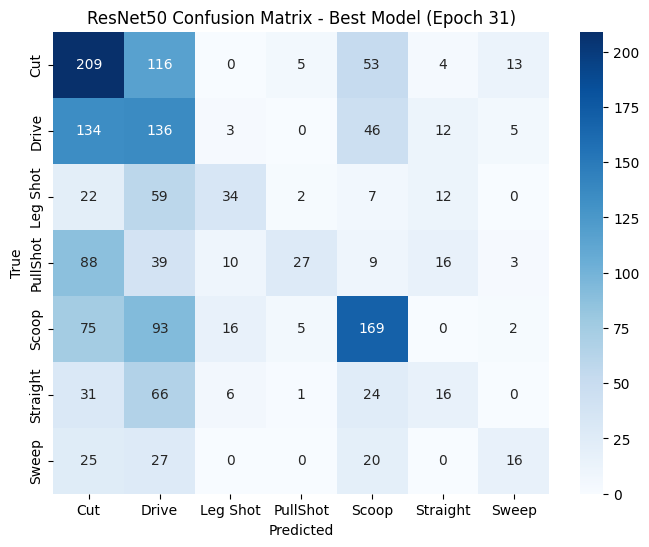

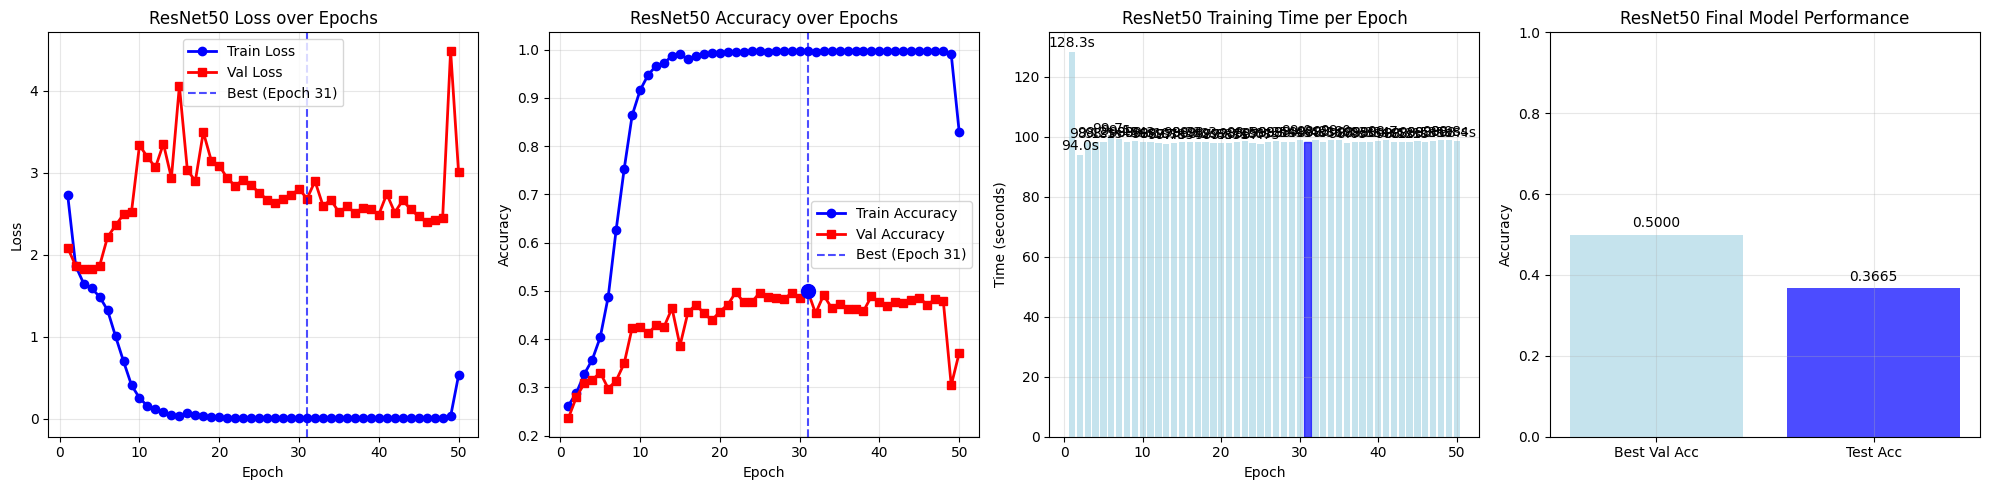


‚è∞ ResNet50 Final Timing Summary:
‚îÇ Total Training: 4942.47s
‚îÇ Average per Epoch: 98.85s
‚îÇ Testing Time: 18.55s
‚îÇ Total Runtime: 4961.02s

üíæ ResNet50 Files saved:
‚îÇ best_resnet50_model.pth - Best validation accuracy model
‚îÇ resnet50_training_history.csv - Training metrics for later plotting

üèóÔ∏è  ResNet50 Architecture Summary:
‚îÇ Total Parameters: 23,522,375
‚îÇ Trainable Parameters: 23,522,375
‚îÇ Model Size: 89.73 MB
‚îÇ Input Size: 224x224x3
‚îÇ Output Classes: 7
‚îÇ Architecture: ResNet50
‚îÇ Block Type: Bottleneck
‚îÇ Layers: [3, 4, 6, 3]
‚îÇ Skip Connections: Yes
‚îÇ Batch Normalization: Yes
‚îÇ Activation: ReLU
‚îÇ Zero Init Residual: Yes


In [10]:
# -----------------------------
# 4. Training Loop with Best Model Saving (Val Accuracy) - ResNet50
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking
best_val_acc = 0.0
best_model_state = None
best_epoch = 0

print(f"\nüöÄ Starting ResNet50 Training for {epochs} epochs...")
print("=" * 80)

total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\nüìà Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("üîÑ Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc=f"Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"‚úÖ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("üîç Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc=f"Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"‚úÖ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model so far based on val_acc
    is_best = val_acc > best_val_acc
    if is_best:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"üåü New best ResNet50 model found! Validation Accuracy: {val_acc:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\nüìä Epoch {epoch+1} Summary:")
    print(f"‚îÇ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"‚îÇ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"‚îÇ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"‚îÇ Total Epoch Time: {epoch_time:.2f}s")
    print(f"‚îÇ Best Val Acc: {best_val_acc:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"‚îÇ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_resnet50_model.pth')
    print(f"\nüíæ Best ResNet50 model saved as 'best_resnet50_model.pth'")
    print(f"üìä Best model stats:")
    print(f"‚îÇ Best Epoch: {best_epoch}")
    print(f"‚îÇ Best Val Acc: {best_val_acc:.4f}")

# Save training history data to CSV
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}
history_df = pd.DataFrame(history_data)
history_df.to_csv('resnet50_training_history.csv', index=False)
print("\nüíæ ResNet50 training history saved to 'resnet50_training_history.csv'")

# Training Summary
print(f"\nüéâ ResNet50 Training Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")
print("\n‚è±Ô∏è  Epoch Timing Breakdown:")
for i, t in enumerate(epoch_times):
    print(f"‚îÇ Epoch {i+1}: {t:.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\nüß™ Loading Best ResNet50 Model for Testing...")

# Load the best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"‚úÖ Best ResNet50 model from epoch {best_epoch} loaded successfully!")
else:
    print("‚ö†Ô∏è  No best model found, using current model state")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()

test_pbar = tqdm(test_loader, desc="Testing ResNet50", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"‚úÖ ResNet50 Testing completed in {test_time:.2f}s")
print("\nüìã ResNet50 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes,digits=4))
print(f"üéØ ResNet50 Test Accuracy: {test_accuracy:.4f}")

# Model Performance Summary
print(f"\nüìä ResNet50 Model Performance Summary:")
print(f"‚îÇ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"‚îÇ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"‚îÇ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"ResNet50 Confusion Matrix - Best Model (Epoch {best_epoch})")
plt.show()

# -----------------------------
# 6. Enhanced Visualizations
# -----------------------------
plt.figure(figsize=(20, 5))

# Loss Plot
plt.subplot(1, 4, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.legend()
plt.title("ResNet50 Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 4, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='blue', s=100, zorder=5)
plt.legend()
plt.title("ResNet50 Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Timing Plot
plt.subplot(1, 4, 3)
bars = plt.bar(range(1, epochs+1), epoch_times, color='lightblue', alpha=0.7)
bars[best_epoch-1].set_color('blue')
plt.title("ResNet50 Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, alpha=0.3)
for i, t in enumerate(epoch_times):
    plt.text(i+1, t+0.5, f'{t:.1f}s', ha='center', va='bottom')

# Performance Comparison
plt.subplot(1, 4, 4)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['lightblue', 'blue']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("ResNet50 Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n‚è∞ ResNet50 Final Timing Summary:")
print(f"‚îÇ Total Training: {total_training_time:.2f}s")
print(f"‚îÇ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"‚îÇ Testing Time: {test_time:.2f}s")
print(f"‚îÇ Total Runtime: {total_training_time + test_time:.2f}s")

print(f"\nüíæ ResNet50 Files saved:")
print(f"‚îÇ best_resnet50_model.pth - Best validation accuracy model")
print(f"‚îÇ resnet50_training_history.csv - Training metrics for later plotting")

# -----------------------------
# 7. ResNet50 Architecture Summary
# -----------------------------
print(f"\nüèóÔ∏è  ResNet50 Architecture Summary:")
print(f"‚îÇ Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"‚îÇ Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"‚îÇ Model Size: {sum(p.numel() * p.element_size() for p in model.parameters()) / 1024**2:.2f} MB")
print(f"‚îÇ Input Size: 224x224x3")
print(f"‚îÇ Output Classes: {len(classes)}")
print(f"‚îÇ Architecture: ResNet50")
print(f"‚îÇ Block Type: Bottleneck")
print(f"‚îÇ Layers: [3, 4, 6, 3]")
print(f"‚îÇ Skip Connections: Yes")
print(f"‚îÇ Batch Normalization: Yes")
print(f"‚îÇ Activation: ReLU")
print(f"‚îÇ Zero Init Residual: Yes")


In [11]:
import pandas as pd
df=pd.read_csv("/kaggle/working/resnet50_training_history.csv")
df

epoch  train_loss  val_loss  train_acc   val_acc  epoch_time
0       1    2.726500  2.084568   0.261997  0.235693  128.343086
1       2    1.863449  1.865404   0.287926  0.279367   94.010916
2       3    1.648861  1.825034   0.327399  0.307982   98.136610
3       4    1.588883  1.829951   0.357198  0.315512   98.247132
4       5    1.488618  1.864615   0.403638  0.330572   98.106851
5       6    1.322421  2.215847   0.487423  0.297440   99.726781
6       7    1.004660  2.356831   0.626935  0.314006   99.118838
7       8    0.699973  2.491902   0.752128  0.349398   98.324653
8       9    0.409763  2.524561   0.863390  0.423193   98.382657
9      10    0.252978  3.335024   0.915635  0.424699   98.270561
10     11    0.155922  3.188765   0.947175  0.411898   98.098074
11     12    0.114859  3.065026   0.966331  0.428464   97.993995
12     13    0.088080  3.351794   0.971362  0.425452   97.708379
13     14    0.046391  2.935145   0.987229  0.463855   97.787212
14     15    0.029721  4.056666   0.990132  0.386295   98.263289
15     16    0.066637  3.032944   0.979296  0.455572   98.301866
16     17    0.043957  2.897738   0.986842  0.471386   98.152373
17     18    0.028000  3.494351   0.990519  0.453313   98.340079
18     19    0.019567  3.146672   0.993034  0.439006   97.812530
19     20    0.019814  3.084250   0.992260  0.457078   97.810703
20     21    0.010779  2.933559   0.995163  0.471386   97.745605
21     22    0.013177  2.837962   0.994389  0.496988   98.076164
22     23    0.011196  2.916273   0.994389  0.475904   98.485300
23     24    0.008065  2.846507   0.996904  0.476657   98.004009
24     25    0.008371  2.755415   0.996711  0.496235   97.690379
25     26    0.007547  2.670119   0.995743  0.487199   98.290472
26     27    0.006254  2.624853   0.996130  0.484940   98.450646
27     28    0.007029  2.676748   0.996517  0.482681   98.364503
28     29    0.006745  2.724438   0.995937  0.495482   98.369878
29     30    0.011490  2.802999   0.996130  0.485693   99.007040
30     31    0.009308  2.682056   0.996517  0.500000   98.357121
31     32    0.010233  2.896123   0.995743  0.453313   98.862868
32     33    0.008794  2.598531   0.996517  0.490964   98.325406
33     34    0.006173  2.667071   0.997485  0.464608   98.772892
34     35    0.006789  2.517360   0.996711  0.472892   99.024067
35     36    0.007261  2.587813   0.995937  0.461596   98.014775
36     37    0.006387  2.513500   0.996517  0.461596   98.322147
37     38    0.006123  2.567719   0.997485  0.457831   98.295645
38     39    0.005903  2.560029   0.996711  0.488705   98.276879
39     40    0.006334  2.489564   0.996517  0.475904   98.383694
40     41    0.006794  2.740315   0.996324  0.469127   98.749449
41     42    0.006824  2.514440   0.996130  0.477410   98.053061
42     43    0.007206  2.662274   0.996711  0.474398   98.173251
43     44    0.006693  2.552109   0.996711  0.481928   98.057798
44     45    0.005407  2.466284   0.996711  0.485693   98.514928
45     46    0.007089  2.394983   0.996517  0.470633   98.290743
46     47    0.007349  2.426988   0.996517  0.483434   98.476925
47     48    0.005846  2.443585   0.997291  0.479669   98.867996
48     49    0.029391  4.486493   0.989938  0.304217   98.760073
49     50    0.530016  3.003161   0.828947  0.371235   98.447156